In [4]:
import matplotlib as cm
import numpy as np
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt 



from scipy.integrate import quad
from matplotlib.patches import Polygon

In [6]:

cm.style.use('ggplot')
%matplotlib inline

## PDF
The probability density function (PDF) is used to specify the probability of the random variable falling within a particular range of values, as opposed to taking on any one value. This probability is given by the integral of this variable’s PDF over that range — that is, it is given by the area under the density function but above the horizontal axis and between the lowest and greatest values of the range. This definition might not make much sense so let’s clear it up by graphing the probability density function for a normal distribution. The equation below is the probability density function for a normal distribution

\begin{equation}
f(x | \mu , \sigma^2) = \frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{(x- \mu)^2}{2 \sigma^2}}\text{, where $x\in \mathbb{R}$}
\end{equation}



Let's consider the special condition for standard normal distribution where the $ \mu = 0 $  and the $\sigma^2$=1 ,

\begin{equation}
f(x) = \frac{1}{ \sqrt{2 \pi}}e^{-\frac{x^2}{2}}
\end{equation}



In [1]:
def get_pdf_normal_distribution(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return constant * np.exp((-x**2) / 2.0)

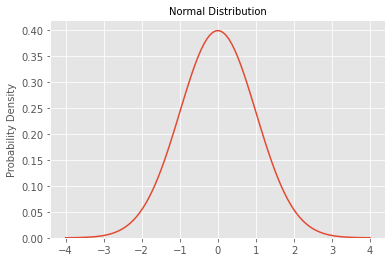

In [7]:
x = np.linspace(-4, 4, num = 100)
fig, ax = plt.subplots();
pdf = get_pdf_normal_distribution(x)
ax.plot(x,pdf);
ax.set_ylim(0);
ax.set_title('Normal Distribution', size = 10);
ax.set_ylabel('Probability Density', size = 10);

## CDF
The graph above does not show you the probability of ev
ents but their **probability density**. To get the probability of an event within a given range we will need to integrate.The area under the pdf curve for a given range is called ``Cumulative distribution function`` (CDF). Formally cumulative distribution function is the probability that the variable takes a value less than or equal to x. 

For a continuous distribution, this can be expressed mathematically as

$$CDF = \int_{-\infty}^{x} {f(x) dx}$$

For a discrete distribution, the cdf can be expressed as

$$CDF = \sum_{i=0}^{x}f(i)$$

For now We are interested in finding the probability of a random data point landing within 1 standard deviation of the mean, we need to integrate from -1 to 1.

In [22]:
def cdf_normal_distribution(lower_limit=-1, upper_limit=1):
    result, _ = quad(get_pdf_normal_distribution, 
                     lower_limit, 
                     upper_limit,
                     limit = 1000)
    return result

cdf_normal_distribution()

0.682689492137086

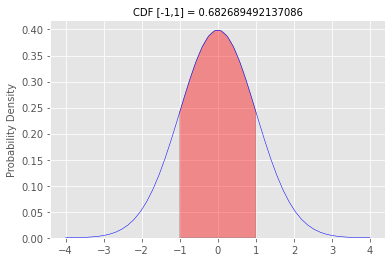

In [23]:
def plot_cdf(lower_limit=-1, upper_limit=1):
    x = np.linspace(-4, 4)
    y = get_pdf_normal_distribution(x)
    cdf = cdf_normal_distribution(lower_limit=lower_limit, 
                                 upper_limit=upper_limit)

    #plot the pdf
    fig, ax = plt.subplots()
    ax.plot(x, y, 'b', linewidth=.5)
    ax.set_ylim(ymin=0)
    
    

    # plot the cdf
    ix = np.linspace(lower_limit, upper_limit)
    iy = get_pdf_normal_distribution(ix)
    verts = [(lower_limit, 0)] + list(zip(ix, iy)) + [(upper_limit, 0)]
    poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
    ax.add_patch(poly)

    ax.set_title(f'CDF [{lower_limit},{upper_limit}] = {cdf}', fontsize = 10);
    ax.set_ylabel(r'Probability Density', fontsize = 10);
    

plot_cdf()

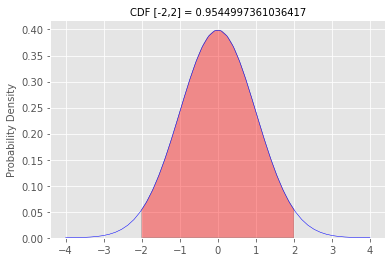

In [24]:
plot_cdf(lower_limit=-2, upper_limit=2)

## Standard Normal Table
The standard normal table entries are the area under the standard normal curve to the left of value (between negative infinity and value) .Integrating the PDF, gives the cumulative distribution function (CDF) which is a function that maps values to their percentile rank in a distribution. The values in the table are calculated using the cumulative distribution function of a standard normal distribution with a mean of zero and a standard deviation of one

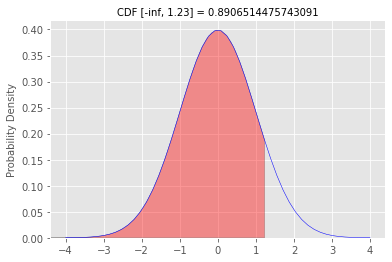

In [37]:
lower_limit = -5 # value is only used for plotting the actual value is -inf
upper_limit = 1.23
x = np.linspace(-4, 4)
y = get_pdf_normal_distribution(x)
cdf = cdf_normal_distribution(lower_limit=np.NINF, 
                             upper_limit=upper_limit)

#plot the pdf
fig, ax = plt.subplots()
ax.plot(x, y, 'b', linewidth=.5)
ax.set_ylim(ymin=0)



# plot the cdf
ix = np.linspace(lower_limit, upper_limit)
iy = get_pdf_normal_distribution(ix)
verts = [(-3, 0)] + list(zip(ix, iy)) + [(upper_limit, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
ax.add_patch(poly)

ax.set_title(f'CDF [{np.NINF}, {upper_limit}] = {cdf}', fontsize = 10);
ax.set_ylabel(r'Probability Density', fontsize = 10);

In [25]:
index = np.round(np.arange(0, 3.5, .1),2)
columns = np.round(np.arange(0.00, .1, .01), 2)


In [26]:
standard_normal_table = pd.DataFrame(data = [],
                                     index = index,
                                     columns = columns)

for index in standard_normal_table.index:
    for column in standard_normal_table.columns:
        z = np.round(index + column, 2)
        value, _ = quad(get_pdf_normal_distribution, np.NINF, z)
        standard_normal_table.loc[index, column] = value

standard_normal_table.index = standard_normal_table.index.astype(str)
standard_normal_table.columns = [str(column).ljust(4,'0') for column in standard_normal_table.columns]

In [27]:
standard_normal_table

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.0,0.5,0.503989,0.507978,0.511966,0.515953,0.519939,0.523922,0.527903,0.531881,0.535856
0.1,0.539828,0.543795,0.547758,0.551717,0.55567,0.559618,0.563559,0.567495,0.571424,0.575345
0.2,0.57926,0.583166,0.587064,0.590954,0.594835,0.598706,0.602568,0.60642,0.610261,0.614092
0.3,0.617911,0.62172,0.625516,0.6293,0.633072,0.636831,0.640576,0.644309,0.648027,0.651732
0.4,0.655422,0.659097,0.662757,0.666402,0.670031,0.673645,0.677242,0.680822,0.684386,0.687933
0.5,0.691462,0.694974,0.698468,0.701944,0.705401,0.70884,0.71226,0.715661,0.719043,0.722405
0.6,0.725747,0.729069,0.732371,0.735653,0.738914,0.742154,0.745373,0.748571,0.751748,0.754903
0.7,0.758036,0.761148,0.764238,0.767305,0.77035,0.773373,0.776373,0.77935,0.782305,0.785236
0.8,0.788145,0.79103,0.793892,0.796731,0.799546,0.802337,0.805105,0.80785,0.81057,0.813267
0.9,0.81594,0.818589,0.821214,0.823814,0.826391,0.828944,0.831472,0.833977,0.836457,0.838913
